# Atividade somativa 02 - IA aplicanda a Saúde
### Aluno: Gustavo Freitas Motta

## Descrição do projeto

A ideia do projeto é realizar uma análise preditiva em casos de doença de Alzheimer. O intuito do estudo é conseguir realizar o diagnóstico e acompanhamento dos pacientes de maneira mais fácil e rápida.

A organização HSA - Hospital do Alzheimer, um hospital reconhecido mundialmente por seus estudos e avanços científicos sobre a doença de Alzheimer esta buscando encontrar formas de conseguir identificar a doença de Alzheimer de maneiras mais rápidas e correlacionar possíveis causas.

Com esse projeto os estudos poderão evoluir e conseguiremos identificar de maneira mais eficiente a doença em seus estágios iniciais, assim podendo desenvolver um tratamento mais eficaz para cada um dos pacientes e trazendo melhor qualidade de vida para todos os pacientes.

## Descrição das tecnologias

Para o projeto iremos desenvolver uma aplicação em Python usando o Jupyter Notebook, visando melhorar o entendimento do desenvolvimento da aplicação para todos que se interessarem.

Lista de Tecnologias:

- Python
- Jupyter Lab
- Pandas - Para extração e visualização de dados.
- SkLearn - Para treinamento do nosso modelo.
- MatPlot - Para a plotagem de gráficos demonstrativos.

Neste projeto usaremos tecnologias que são amplamente adotadas no mundo de ML e analise de dados.

## Descrição do Dataset

Neste projeto iremos usar o dataset disponível no [kaggle](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data), neste dataset teremos disponível os dados médicos de 2149 pacientes. Dentro dos dados deste dataset podemos encontrar fatores demográficos, hábitos de vida, detalhes médicos e históricos, sintomas, avaliações cognitivas e evolução da doença de Alzheimer.

Os dados deste dataset são ideias para desenvolver modelos preditivos e realizar analise estatísticas da progressão da doença.

#### Dados relevantes para nosso projeto

- Idade: Pacientes entre 60 e 90 anos.
- Grau escolar: 0 - Nenhum; 1 - Ensino médio; 2 - Superior; 3 - Mestre/Doutor
- Atividade física: Atividade física feita durante a semana de 0 até 10 horas.
- Qualidade de alimentação: Qualidade da dieta de 0 a 10.
- Qualidade do sono: Qualidade do sono variando de 4 a 10.
- Historico familiar de Alzheimer: Onde 0 indica não e 1 sim.
- Depressão: Onde 0 indica não e 1 sim.
- Ferimentos na Cabeça: Onde 0 indica não e 1 sim.
- Confusão: Onde 0 indica não e 1 sim.
- Desorientação: Onde 0 indica não e 1 sim.
- Mudanças de personalidade: Onde 0 indica não e 1 sim.
- Dificuldade em completar tarefas: Onde 0 indica não e 1 sim.
- Esquecimento: Onde 0 indica não e 1 sim.
- Diagnostico de Alzheimer: Onde 0 indica não e 1 sim.

## Inicio da exploração de dados

#### Neste primeiro momento vamos realizar as importações de bibliotecas necessárias

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings

# Visualizção de colunas
pd.set_option('display.max_columns', None)
# Ignorar warnings
warnings.filterwarnings("ignore")

Agora iremos importar os dados do dataset usando o `pandas`.

In [19]:
df = pd.read_csv('./alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


Agora vamos remover as colunas que não iremos utilizar no projeto. 

In [20]:
df.drop(['PatientID', 'Gender', 'Ethnicity', 'BMI', 'Smoking', 'AlcoholConsumption', 'Hypertension', 'CardiovascularDisease', 'Diabetes', 'DoctorInCharge'], axis=1, inplace=True)

# Validando dados duplicados
print('Duplicados:', df.duplicated().sum())

Duplicados: 0


Agora iremos identificar colunas numerica e de categorias para a plotagem do gráfico e visualização dos dados.

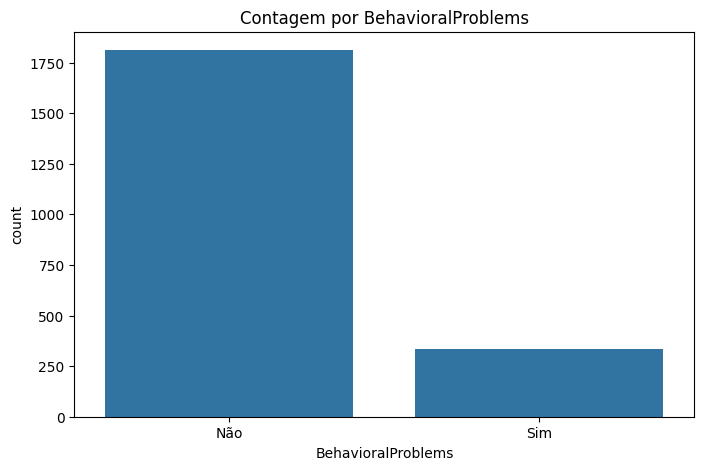

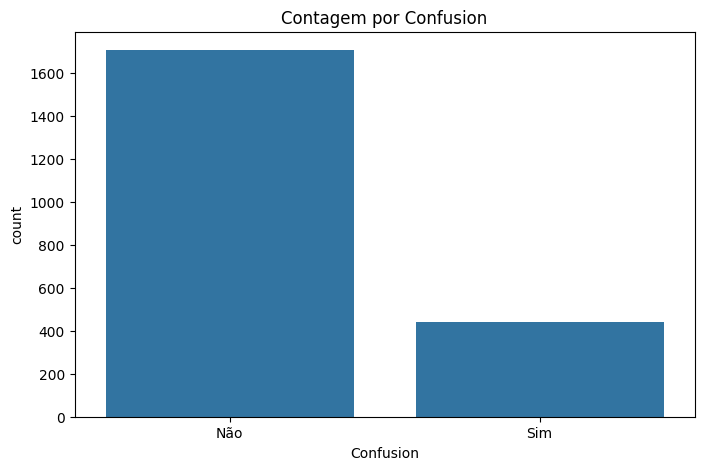

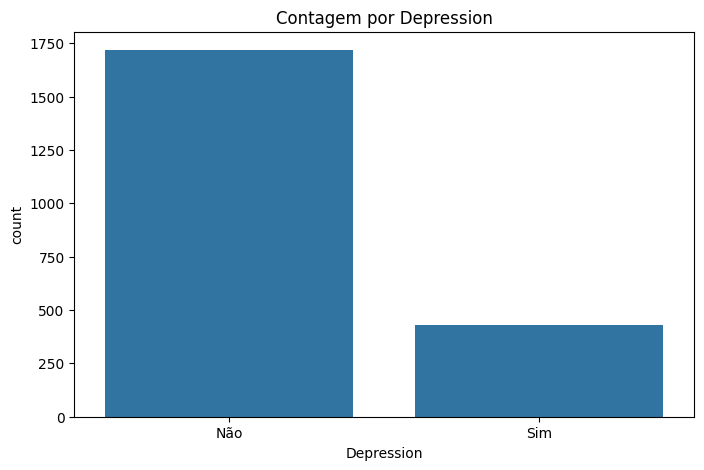

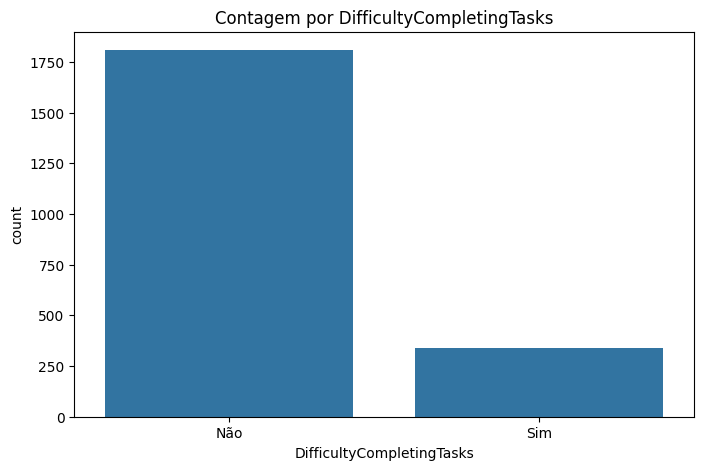

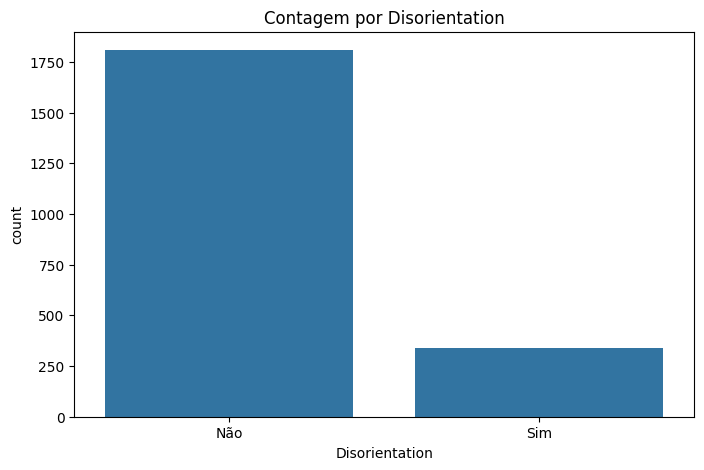

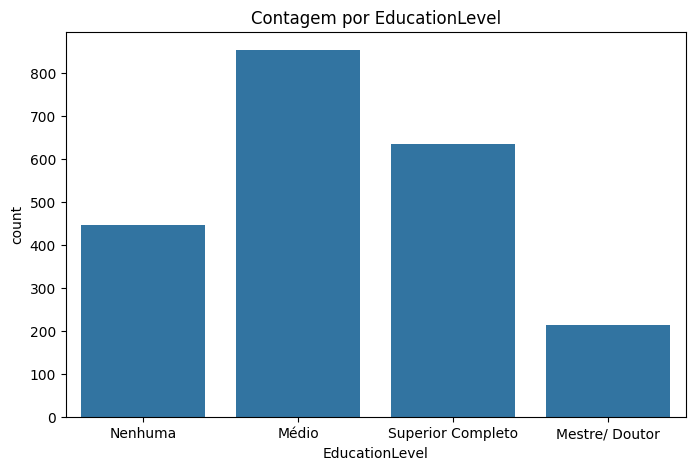

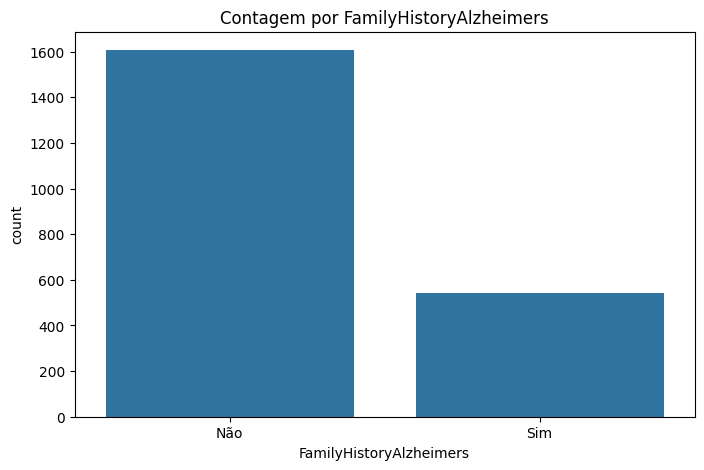

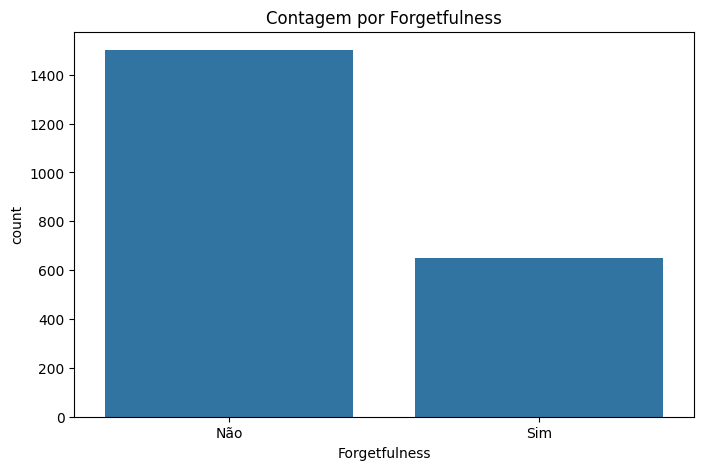

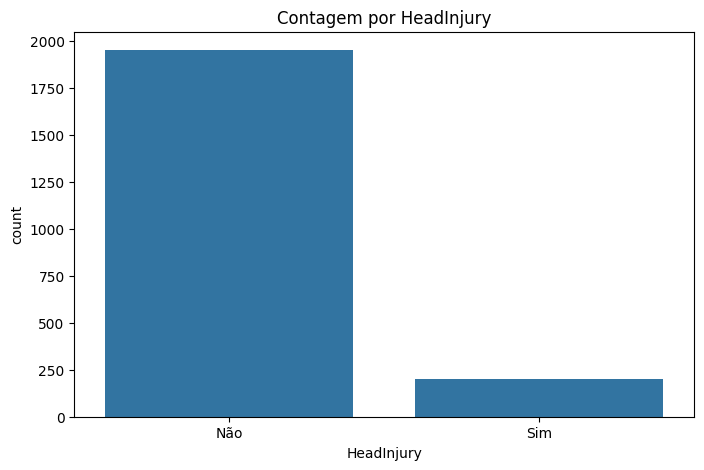

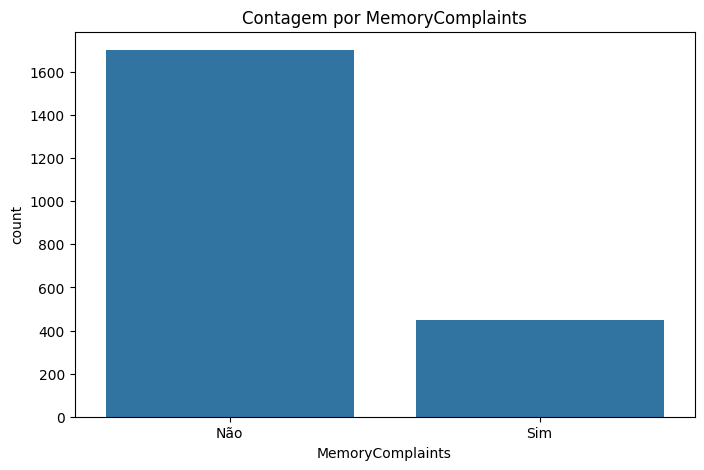

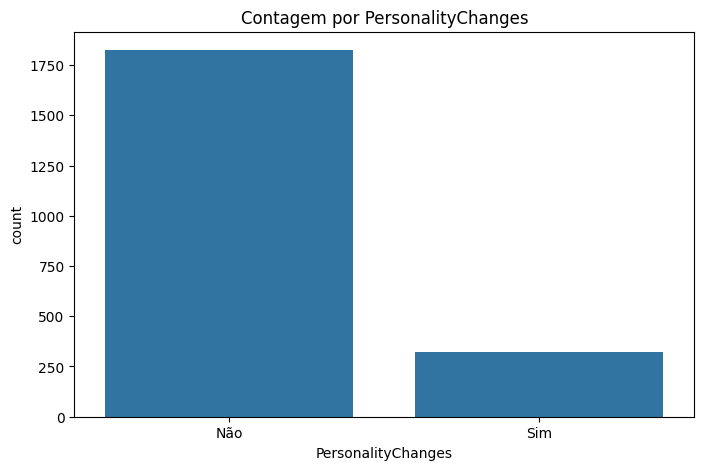

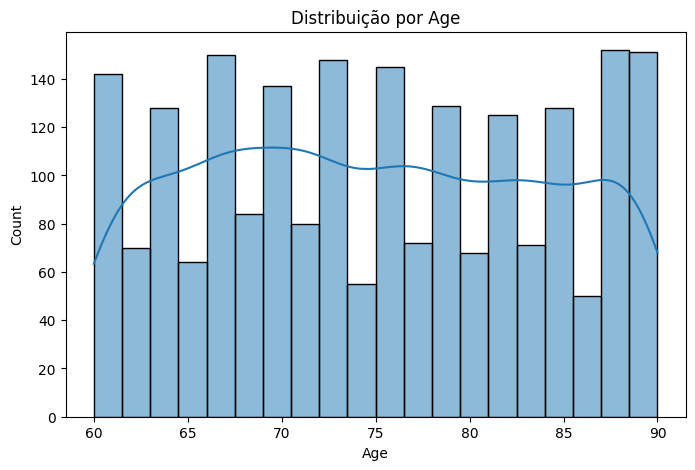

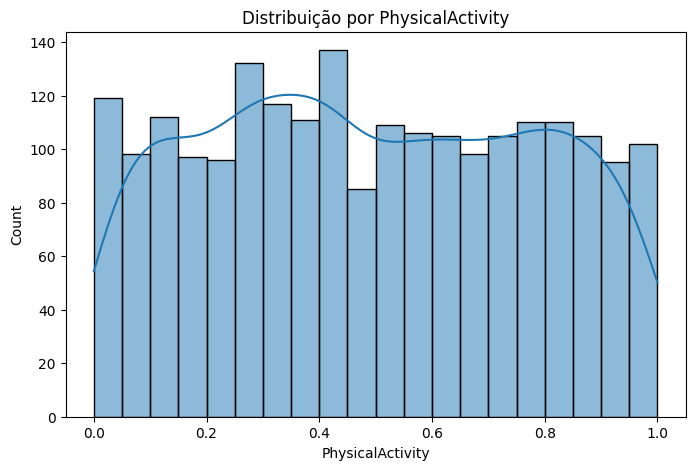

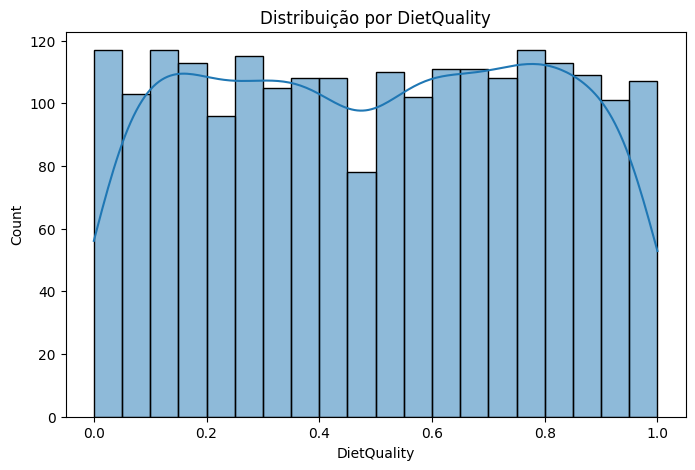

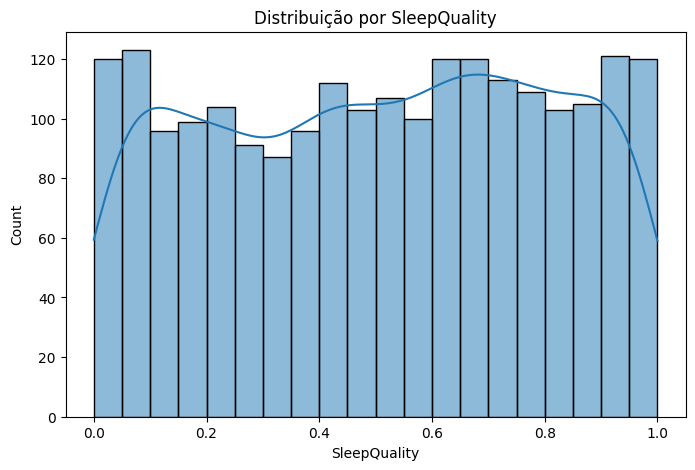

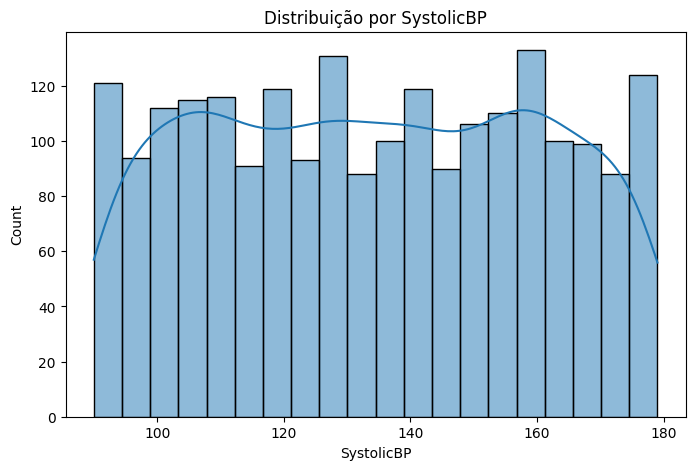

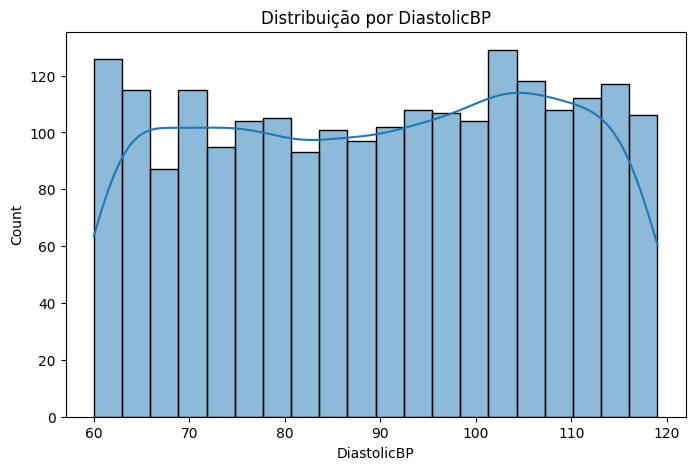

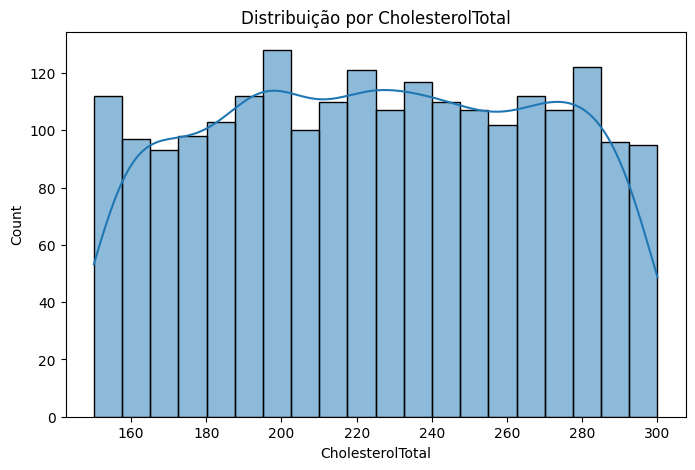

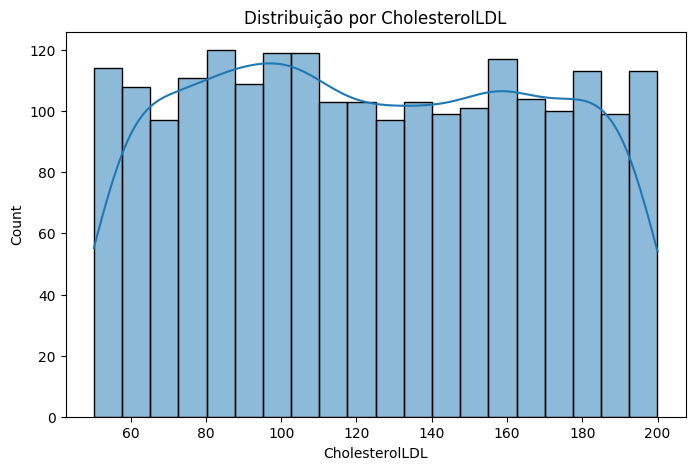

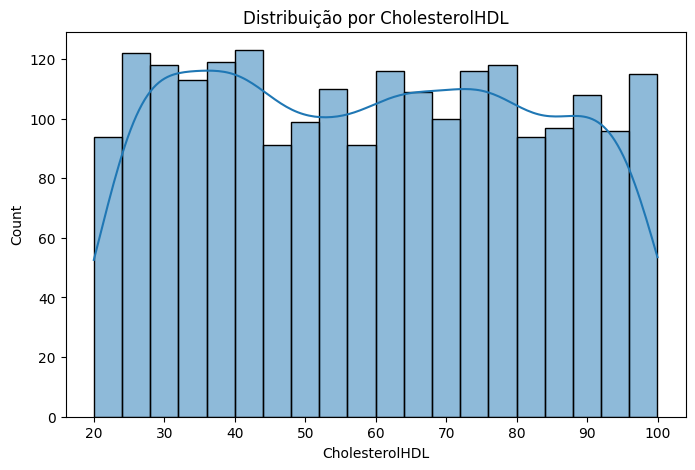

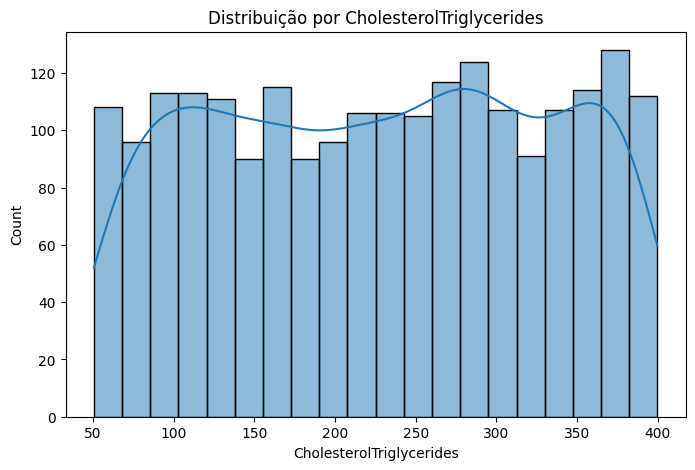

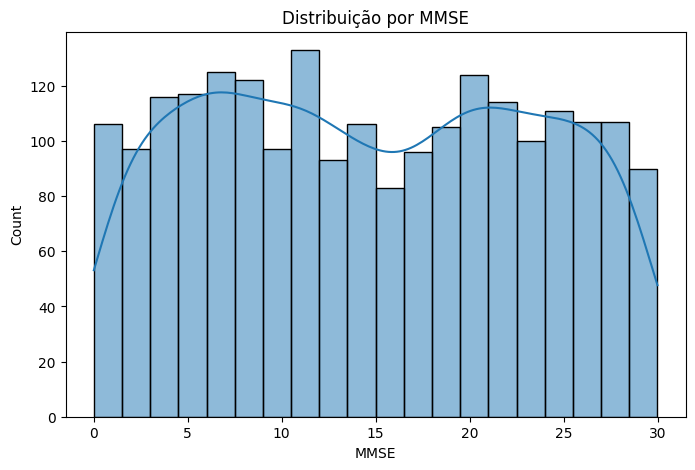

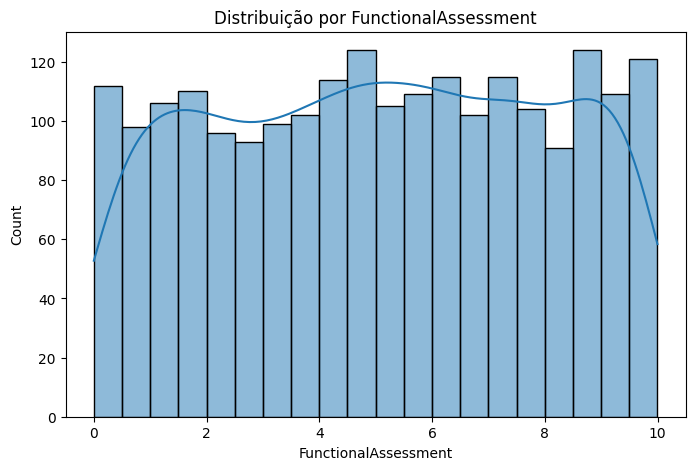

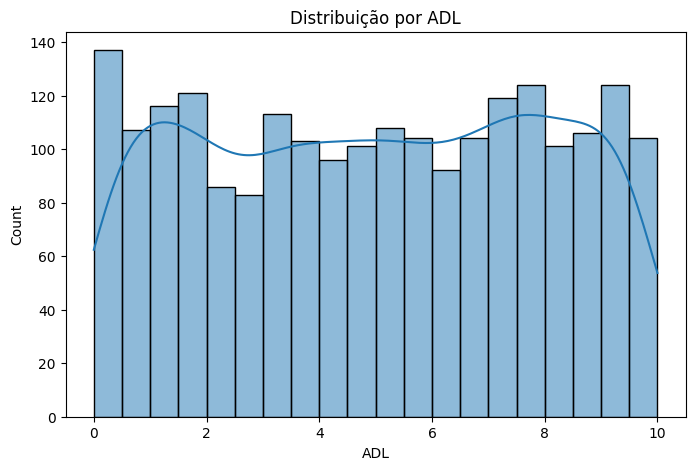

In [24]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

# Custom labels for the categorical columns
custom_labels = {
    'EducationLevel': ['Nenhuma', 'Médio', 'Superior Completo', 'Mestre/ Doutor'],
    'Smoking': ['Não', 'Sim'],
    'FamilyHistoryAlzheimers': ['Não', 'Sim'],
    'Depression': ['Não', 'Sim'],
    'HeadInjury': ['Não', 'Sim'],
    'MemoryComplaints': ['Não', 'Sim'],
    'BehavioralProblems': ['Não', 'Sim'],
    'Confusion': ['Não', 'Sim'],
    'Disorientation': ['Não', 'Sim'],
    'PersonalityChanges': ['Não', 'Sim'],
    'DifficultyCompletingTasks': ['Não', 'Sim'],
    'Forgetfulness': ['Não', 'Sim']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Contagem por {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribuição por {column}')
    plt.show()

#### Observações dos gráficos

- Podemos visualizar que no geral, o conjunto de dados consiste predominantemente de indivíduos sem doenças ou problemas de saúde.
- Os concluintes do ensino médio constituem o maior grupo educacional, seguidos de perto por indivíduos com diploma de bacharel.
- Com relação aos valores numéricos podemos ver uma distribuição uniforme.

Com a visualização dos dados agora podemos partir para o pré-processamento e treinamento de modelo.

In [25]:

colunas = ['PhysicalActivity', 'DietQuality','SleepQuality' , 'EducationLevel', 'FamilyHistoryAlzheimers', 'Depression', 'HeadInjury', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

# Normalização dos dados
scaler = MinMaxScaler()
df[colunas] = scaler.fit_transform(df[colunas])

# calculando média com scaler
standard_scaler = StandardScaler()
df[colunas] = standard_scaler.fit_transform(df[colunas])

Agora vamos separar as bases de teste e treinamento e realizar as cargas de dados.

In [26]:
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

Tamanho do conjunto de treinamento: (1611, 24)
Tamanho do conjunto de teste: (538, 24)


Realizando treinamento do nosso modelo.

In [35]:
modelo_rfr = RandomForestClassifier(random_state=0).fit(X_train, y_train)
predicoes_rfr = modelo_rfr.predict(X_test)

# Treinando com o LogisticRegression
modelo = LogisticRegression(random_state=0).fit(X_train, y_train)
predicoes = modelo.predict(X_test)

print("predições de teste: ", predicoes)

predições de teste:  [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 0

### Conclusão
Com base na análise dos dados e nos modelos treinados, podemos concluir que os modelos de RandomForestClassifier e LogisticRegression apresentaram um bom desempenho na predição do diagnóstico de Alzheimer. A normalização e padronização dos dados foram etapas cruciais para garantir a eficácia dos modelos. A visualização dos dados também nos permitiu entender melhor a distribuição e a correlação entre as variáveis. Este estudo demonstra a viabilidade de usar técnicas de aprendizado de máquina para auxiliar no diagnóstico precoce da doença de Alzheimer, o que pode contribuir significativamente para o tratamento e a qualidade de vida dos pacientes.